In [1]:
from conda_build.features import feature_list
from mpmath import arange
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomTreesEmbedding, RandomForestRegressor
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np

In [24]:
#初始数据的计算
data = pd.read_csv('../data/temps.csv')

In [25]:
date = pd.to_datetime(data[['year','month','day']])

In [26]:
import matplotlib.pyplot as plt

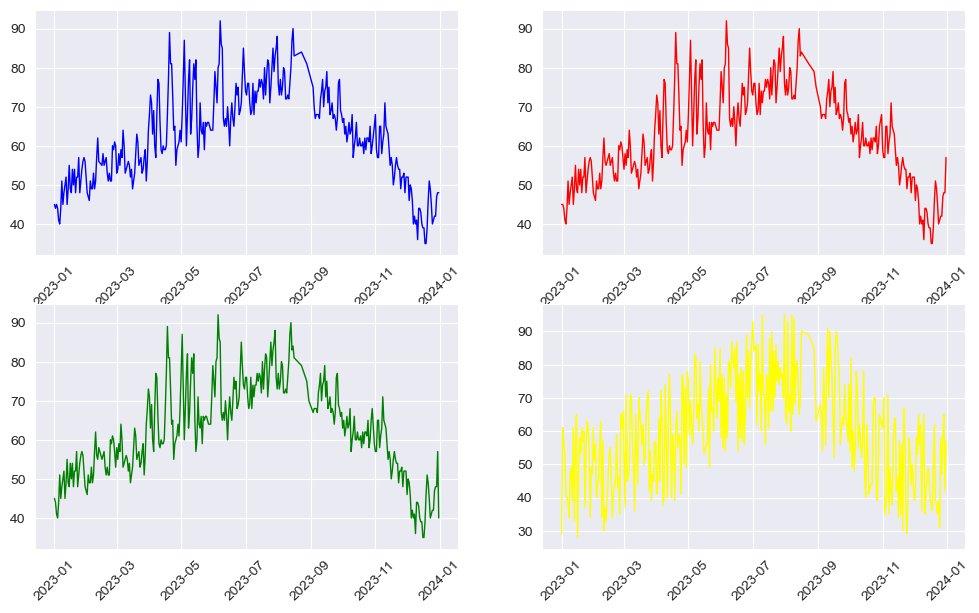

In [18]:
#基本数据的展示
plt.figure(figsize=(12,7),dpi=100)
plt.subplot(221)
plt.plot(date,data['temp_2'],linewidth=1,color='blue')
plt.xticks(rotation=45)
plt.subplot(222)
plt.plot(date,data['temp_1'],linewidth=1,color='red')
plt.xticks(rotation=45)
plt.subplot(223)
plt.plot(date,data['actual'],linewidth=1,color='green')
plt.xticks(rotation=45)
plt.subplot(224)
plt.plot(date,data['friend'],linewidth=1,color='yellow')
plt.xticks(rotation=45)
plt.show()

In [27]:
data = pd.get_dummies(data)

In [39]:
data1 = pd.read_csv('../data/temps_extended.csv')
data1 = pd.get_dummies(data1)
data1.columns

Index(['year', 'month', 'day', 'ws_1', 'prcp_1', 'snwd_1', 'temp_2', 'temp_1',
       'average', 'actual', 'friend', 'weekday_Fri', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues',
       'weekday_Wed'],
      dtype='object')

In [83]:
#得到原始的数据集
feature_source = data.drop(['actual','friend'],axis=1)
target_source = data['actual']

In [58]:
#得到增加数据(不含新特征)
feature_add0 = data1.drop(['actual','prcp_1','snwd_1','friend','ws_1'],axis=1)
target_add0 = data1['actual']

In [53]:
#得到增加数据(含新特征)
feature_add1 = data1.drop(['actual','friend'],axis=1)
target_add1 = data1['actual']

In [66]:
#得到增加数据(含核心特征)
import_feature =['temp_1','average','ws_1','day','temp_2','year','prcp_1']
feature_add2 = data1[import_feature]
target_add2 = data1['actual']

In [68]:
X_list = [feature_source,feature_add0,feature_add1,feature_add2]
y_list  = [target_source,target_add0,target_add1,target_add2]


In [44]:
from sklearn.model_selection import cross_validate, KFold 

In [46]:
cv = KFold(n_splits=5, shuffle=True, random_state=1210)


In [71]:
names = ['原始数据集','增加数据(不含新特征)数据集','增加数据集(含新特征)数据集','增加数据集(核心特征)数据集']

In [ ]:
def evaluate(model,X_test, target):
    predict = model.predict(X_test)
    error = abs(predict - target)
    mape = 100 * np.mean(error / target)
    accuracy = 100 - mape
    print(f"平均的气候误差: {np.mean(error)}")
    print(f"准确率: {accuracy:.2f}%")

In [78]:
#对三个数据集循环
train_score_list = []
test_score_list = []
fit_time_list = []
for X,y in zip(X_list,y_list):
    rfg = RandomForestRegressor(random_state=1210)
    result_gbdt = cross_validate(
    rfg,                 # 传递给模型的对象
    X,                   # 特征变量的数据集
    y,                   # 目标变量的数据集
    cv=cv,               # 交叉验证的分割顺序
    scoring='neg_mean_absolute_error',  # 负的均方根误差
    return_train_score=True,  # 是否在交叉验证中返回训练分数
    verbose=True,        # 控制输出的冗余程度
    n_jobs=-1,           # 并行作业的数量
)
    # print(f"训练时间为:",result_gbdt['fit_time'])
    # print(f"训练分数为",result_gbdt['fit_time'])
    train_score_list.append(result_gbdt['train_score'])
    test_score_list.append(result_gbdt['test_score'])
    fit_time_list.append(result_gbdt['fit_time'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


In [79]:
for index,score in enumerate(test_score_list):
    mean_score = - np.mean(score)
    print(f"{names[index]}测试集的平均绝对值误差为:", mean_score)

原始数据集测试集的平均绝对值误差为: 3.75288364389234
增加数据(不含新特征)数据集测试集的平均绝对值误差为: 3.9415870024235233
增加数据集(含新特征)数据集测试集的平均绝对值误差为: 3.8511851967422843
增加数据集(核心特征)数据集测试集的平均绝对值误差为: 3.8524644220467854


In [82]:
test_score_list

[array([-3.97028571, -3.788     , -4.00685714, -3.63188406, -3.3673913 ]),
 array([-3.80446469, -4.0489726 , -4.10043379, -3.6956621 , -4.05840183]),
 array([-3.74441913, -3.9196347 , -4.03018265, -3.6159589 , -3.94573059]),
 array([-3.74291572, -3.8609589 , -4.04440639, -3.64589041, -3.96815068])]

In [80]:
for index, score in enumerate(train_score_list):
    mean_score = - np.mean(score)
    print(f"{names[index]}训练集的平均绝对值误差为:", mean_score)

原始数据集训练集的平均绝对值误差为: 1.4499160413604602
增加数据(不含新特征)数据集训练集的平均绝对值误差为: 1.454003752862021
增加数据集(含新特征)数据集训练集的平均绝对值误差为: 1.4146858177892043
增加数据集(核心特征)数据集训练集的平均绝对值误差为: 1.418597060616243


In [81]:
for index, time in enumerate(fit_time_list):
    mean_time =  np.mean(time)
    print(f"{names[index]}平均训练时间为:", mean_time)

原始数据集平均训练时间为: 0.13244810104370117
增加数据(不含新特征)数据集平均训练时间为: 0.5268690586090088
增加数据集(含新特征)数据集平均训练时间为: 0.6766343593597413
增加数据集(核心特征)数据集平均训练时间为: 0.5381743431091308


In [28]:
target = data['actual']

In [29]:
features = data.drop(labels=['actual','friend'], axis=1)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1210)

In [33]:
from time import time
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators=100,random_state=1210)
start_time = time()
rfg.fit(X_train, y_train)
time = time() - start_time
y_pred = rfg.predict(X_test)
print()

In [34]:
time

0.12151622772216797

In [46]:
#分类问题比较一致性,回归问题比较误差
err_average = np.mean(np.abs(y_pred - y_test))

4.162857142857142

In [42]:
err_average

4.162857142857142

In [44]:
#可用来评估的每一个参数
from sklearn.metrics import get_scorer_names
for index,i in enumerate(get_scorer_names()):
    print(f"{index +1 }.{i}")

1.accuracy
2.adjusted_mutual_info_score
3.adjusted_rand_score
4.average_precision
5.balanced_accuracy
6.completeness_score
7.d2_absolute_error_score
8.explained_variance
9.f1
10.f1_macro
11.f1_micro
12.f1_samples
13.f1_weighted
14.fowlkes_mallows_score
15.homogeneity_score
16.jaccard
17.jaccard_macro
18.jaccard_micro
19.jaccard_samples
20.jaccard_weighted
21.matthews_corrcoef
22.max_error
23.mutual_info_score
24.neg_brier_score
25.neg_log_loss
26.neg_mean_absolute_error
27.neg_mean_absolute_percentage_error
28.neg_mean_gamma_deviance
29.neg_mean_poisson_deviance
30.neg_mean_squared_error
31.neg_mean_squared_log_error
32.neg_median_absolute_error
33.neg_negative_likelihood_ratio
34.neg_root_mean_squared_error
35.neg_root_mean_squared_log_error
36.normalized_mutual_info_score
37.positive_likelihood_ratio
38.precision
39.precision_macro
40.precision_micro
41.precision_samples
42.precision_weighted
43.r2
44.rand_score
45.recall
46.recall_macro
47.recall_micro
48.recall_samples
49.recall_we

In [50]:
#中的一个决策树的分类
tree = rfg.estimators_[5]#得到的是随机森林中的某一棵树
from sklearn.tree import export_graphviz
import pydot
export_graphviz(tree,out_file='tree.dot',
                feature_names=features.columns,
                rounded=True
                )
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [86]:
feature_list = features.columns.tolist()

In [87]:
feature_list

['year',
 'month',
 'day',
 'temp_2',
 'temp_1',
 'average',
 'week_Fri',
 'week_Mon',
 'week_Sat',
 'week_Sun',
 'week_Thurs',
 'week_Tues',
 'week_Wed']

In [53]:
rfg_small = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
rfg_small.fit(X_train, y_train)

tree = rfg_small.estimators_[0] # 获取随机森林中的指定的某个树

(278, 13)

In [89]:
importances = rfg_small.feature_importances_
feature_importance = [
    (feature,round(importance))
    for feature,importance in zip(feature_list,importances)
]
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('average', 1),
 ('year', 0),
 ('month', 0),
 ('day', 0),
 ('temp_2', 0),
 ('temp_1', 0),
 ('week_Fri', 0),
 ('week_Mon', 0),
 ('week_Sat', 0),
 ('week_Sun', 0),
 ('week_Thurs', 0),
 ('week_Tues', 0),
 ('week_Wed', 0)]

In [66]:
predict = rfg_small.predict(X_test)
err_average = np.mean(np.abs(predict - y_test))
err_average

3.9340076442144714

In [73]:
#使用两个重要特征进行模型测试
rfg_more_import = RandomForestRegressor(n_estimators=100, random_state=42)
import_indices = [feature_list.index('temp_1'),feature_list.index('average')]
train_import = X_train.iloc[:,import_indices]
test_import = X_test.iloc[:,import_indices]
rfg_more_import.fit(train_import, y_train)
y_pred = rfg_more_import.predict(test_import)
err_average = np.mean(np.abs(y_pred - y_test))

In [81]:
values = list(range(len(importances)))

In [84]:
len(importances)

13

In [91]:
a = 0
for i in importances:
    a += i
a

0.9999999999999999

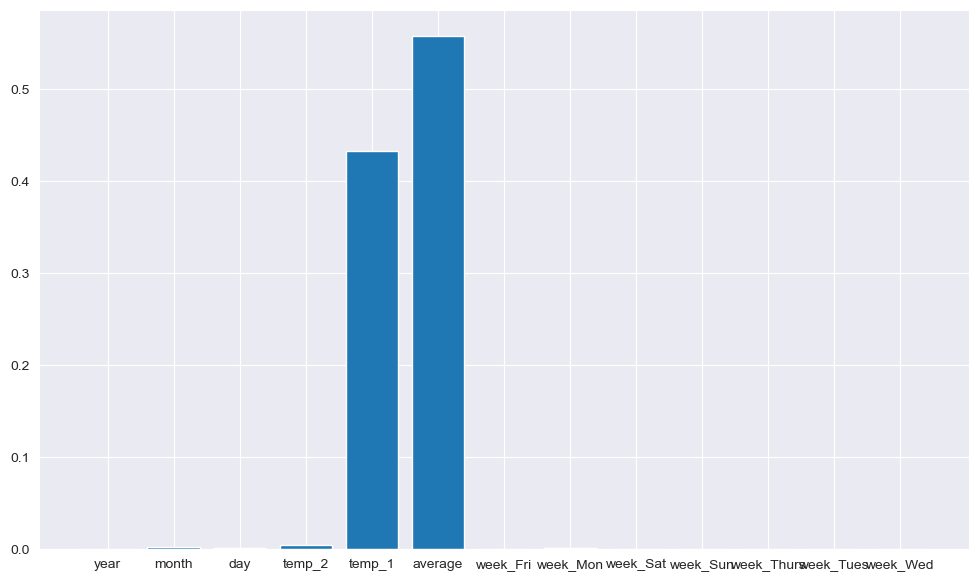

In [88]:
#该方法可得出每个特征的重要程度
plt.figure(figsize=(12,7),dpi=100)
plt.bar(values,importances)
plt.xticks(values,feature_list)
plt.show()

In [2]:
#基于更多数据情况下
data = pd.read_csv('../data/temps_extended.csv')
data.head()
data = pd.get_dummies(data)

In [3]:
def ana_seasons(x):
    if x in [1,2,12]:
        return 'winter'
    elif x in [3,4,5]:
        return 'spring'
    elif x in [6,7,8]:
        return 'summer'
    else:
        return 'fall'
sub_data = data[['temp_1','prcp_1', 'average', 'actual']].copy()
sub_data['seasons'] = data['month'].apply(ana_seasons)

NameError: name 'plt' is not defined

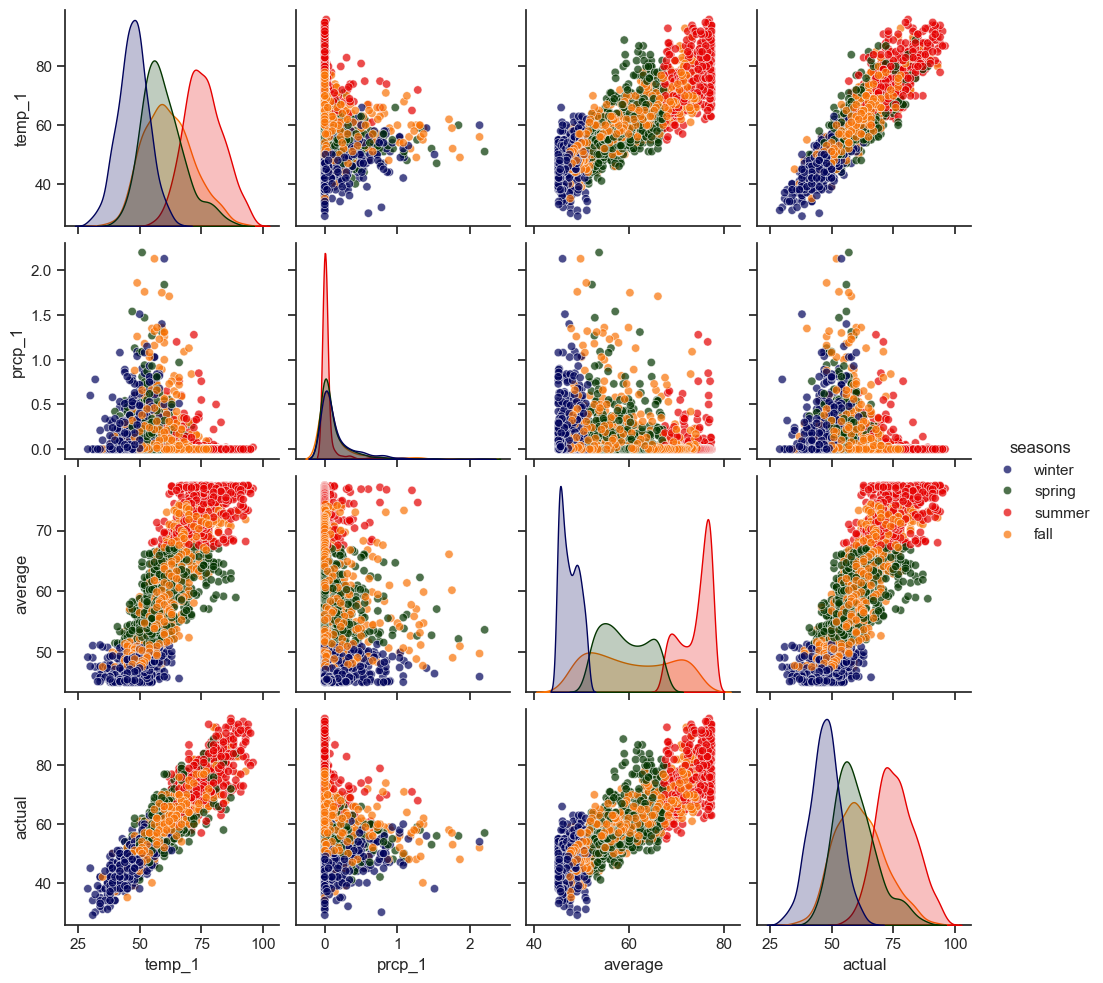

In [4]:
import seaborn as sns
sns.set(style='ticks',color_codes = True)
palette = sns.xkcd_palette(['dark blue','dark green','red','orange'])
sns.pairplot(sub_data,hue = 'seasons',diag_kind='kde',palette=palette,plot_kws=dict(alpha=0.7))
plt.show()

In [5]:
features = data.drop(labels=['actual','friend'], axis=1)
features_list = features.columns.tolist()
X = features.to_numpy()
y = data['actual'].to_numpy()

In [101]:
print(f"X的数据集为:{X.shape}")
print(f"y的数据集为:{y.shape}")

X的数据集为:(2191, 16)
y的数据集为:(2191,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1210)

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
rfg = RandomForestRegressor(n_estimators=100, random_state=1210)
rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
err_average = np.mean(np.abs(y_pred - y_test))

In [10]:
importances = rfg.feature_importances_
feature_importances = list(zip(features_list,importances))
feature_importances = sorted(feature_importances, key=lambda x:x[1], reverse=True)
for i in feature_importances:
    print(f"Veriable: {i[0]:40} \t Importance: {round(i[1],2)}")

Veriable: temp_1                                   	 Importance: 0.85
Veriable: average                                  	 Importance: 0.05
Veriable: ws_1                                     	 Importance: 0.02
Veriable: day                                      	 Importance: 0.02
Veriable: temp_2                                   	 Importance: 0.02
Veriable: year                                     	 Importance: 0.01
Veriable: prcp_1                                   	 Importance: 0.01
Veriable: month                                    	 Importance: 0.01
Veriable: weekday_Wed                              	 Importance: 0.0
Veriable: weekday_Fri                              	 Importance: 0.0
Veriable: weekday_Tues                             	 Importance: 0.0
Veriable: weekday_Mon                              	 Importance: 0.0
Veriable: weekday_Sat                              	 Importance: 0.0
Veriable: weekday_Thurs                            	 Importance: 0.0
Veriable: weekday_Sun     

In [11]:
important_feature_name = ['temp_1','average','ws_1','day','temp_2','year','prcp_1']

In [23]:
[features_list[i].index for i in important_feature_name]

TypeError: list indices must be integers or slices, not str

In [19]:
features[important_feature_name].index(axis=0)

TypeError: 'RangeIndex' object is not callable

In [13]:
X_train_important = 
X_test_important = X_test[:,important_feature_name]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rfg = RandomForestRegressor( random_state=1184)
rfg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1184,
 'verbose': 0,
 'warm_start': False}

In [45]:
# 树的个数
n_estimators = np.arange(200, 2000, 10).astype(int)
# 最大特征的选择方式
max_features = ['sqrt', 'log2']
# 树的最大深度
max_depth = [10, 20, None]
# 叶子节点最小分裂所需的样本数
min_samples_split = [2, 5, 10, 20]
# 叶子节点最小的样本数量
min_samples_leaf = [2, 4, 6, 8]
# 样本采样方法
bootstrap = [True, False]

In [46]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
# time
rfg = RandomForestRegressor()
rfg_random = RandomizedSearchCV(
    estimator=rfg,  # 你指定的算法是什么，
    param_distributions=random_grid,  # 参数的候选空间
    n_iter=500,  # 寻找参数组合的个数。
    scoring='neg_mean_absolute_error',  # 评估方法
    cv=5,  # 交叉验证，
    verbose=2,  # 打印信息都数量
    random_state=1210,  # 随机种子
    n_jobs=-1,  # 让所有的内核都参与计算
)
rfg_random.fit(X_train_important, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': array([ 200,  210,  220,  230,  240,  250,  260,  270,  280,  290,  300,
        310,  320,  330,  340,  350,  360,  370,  380,  390,  400,  41...
       1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510,
       1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620,
       1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730,
       1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840,
       1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950,
       1960, 1970, 1980, 1990])},
                   random_state=1210, scoring='neg_mean_absolute_error',
                   verbose=2)

In [49]:
rfg_random.best_params_

{'n_estimators': 940,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': True}

In [50]:
rfg_random.best_score_

-3.6744649037470096

In [ ]:
def evaluate(model,X_test = X_test_important,target = y_test):
    ypred = model.predict(X_test)
    error = abs(ypred - y_test)
    np.mean(error/target)

In [ ]:
#微调
random_grid = {
    'n_estimators': range(935,945,1),
    'max_features': 'log2',
    'max_depth': None,
    'min_samples_split': [0,1,2,3,4],
    'min_samples_leaf': [0,1,2,3,4],
    'bootstrap': bootstrap
}